For the task of lung cancer classification, we employed the Random Forest model, an ensemble learning method that constructs a multitude of decision trees during training. This model is particularly well-suited for classification prediction tasks, adept at handling a large number of features, and provides insights into the relative importance of each feature.

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [247]:
anotations_path="annotations_features.csv"
pyradiomics_path="extracted_features_transposed.xlsx"
annotations =pd.read_csv(anotations_path)
pyradiomics= pd.read_excel(pyradiomics_path)
pyradiomics= pyradiomics.drop(0, axis=1)
annotations.set_index("id",inplace = True)
pyradiomics.set_index("id",inplace=True)

junction= pyradiomics.join(annotations,on="id", how="inner")

junction.to_csv("junction.csv")

In [248]:

all_features= pd.read_csv("junction.csv")


In [249]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 128 entries, id to malignancy
dtypes: float64(97), int64(13), object(18)
memory usage: 184.1+ KB


In [250]:
for i in all_features.keys():
    print(i)

id
diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_firstorder_10Percentile
original_firstorder_90Percentile
original_firstorder_Energy
original_firstorder_Entropy
original_firstorder_InterquartileRange
original_firstorder_Kurtosis
original_firstorder_Maximum
original_firstorder_

In [252]:
df = pd.read_csv("junction.csv")
df.head()
lis=[]
for i in df.keys():
    if(len(df[i].unique())==1):
        lis.append(i)
for i in lis:
    df=df.drop(i,axis=1)
los=[]
for i in df.keys():
    try:
        df[i].astype(float)
    except:
        los.append(i)
for i in los:
    if i == "id":
        continue
    df=df.drop(i,axis=1)
df.head()
    
array = df.values
X = array[:,1:-2]
Y = array[:,-1]
Y=Y.astype('int')
df.head()

,id,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_Kurtosis,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Minimum,original_firstorder_Range,...,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0068-2,127.797558,150145,9.736006e+09,0.129464,548.035170,0.819436,254.583483,96.0,159.0,...,6,4,5,1,1,5,10.159392,218.412236,279.066171,1
1,LIDC-IDRI-0068-3,128.026790,149977,9.733463e+09,0.116543,1368.003803,0.529379,254.731219,97.0,158.0,...,6,3,5,1,1,5,5.358704,49.669648,40.596753,0
2,LIDC-IDRI-0068-4,128.882328,150187,9.736609e+09,0.132381,478.151780,0.893741,254.545587,93.0,162.0,...,6,4,5,1,1,5,12.510067,336.993531,470.878528,1
3,LIDC-IDRI-0068-5,129.499643,150322,9.738553e+09,0.141223,336.558058,1.131161,254.424356,92.0,163.0,...,6,4,5,1,2,5,14.026190,494.603737,866.258778,1
4,LIDC-IDRI-0072-0,132.816048,151672,9.757064e+09,0.216176,84.257971,3.509849,253.197808,89.0,166.0,...,6,3,1,3,4,3,43.473965,4084.414220,9110.684822,1


In [253]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [254]:
test = SelectKBest(score_func=mutual_info_classif, k=30)
fit = test.fit(X, Y)

In [255]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 49
Selected Features: [ True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False  True
 False  True False  True False False  True False  True False  True False
 False False  True False  True False False  True  True  True  True False
 False  True False False  True False  True False  True False  True  True
  True  True  True False  True False False False False  True False  True
  True False False False False  True False  True False  True  True  True
 False  True  True]
Feature Ranking: [ 1  1  1 24  1  1  1  1  1  1  1  1 35  1  1  1  1  1  1 17 20 16  4 32
 30 39 38 19 11 45  9 22  5 33 26  1  6  1 23  1 36 25  1 12  1 18  1 31
 46 49  1 51  1 29  2  1  1  1  1 40 13  1 34 42  1 41  1 44  1 10  1  1
  1  1  1 27  1 14 37 15 43  1 50  1  1 47  8 48 28  1 21  1  3  1  1  1
  7  1  1]


In [256]:
count= 0
lis=[]
for i in  fit.support_:
    if(i==True):
        lis.append(count)
    count+=1

In [257]:
print(lis)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 35, 37, 39, 42, 44, 46, 50, 52, 55, 56, 57, 58, 61, 64, 66, 68, 70, 71, 72, 73, 74, 76, 81, 83, 84, 89, 91, 93, 94, 95, 97, 98]


In [258]:
count=0
index=0
features=[]
for i in df.keys():
    if i == 'id':
        continue
    if(count==lis[index]):
        features.append(i)
        index+=1
    count+=1
    if(index ==len(lis)):
        break
print(features)
    

['diagnostics_Image-original_Mean', 'diagnostics_Mask-original_VoxelNum', 'original_firstorder_Energy', 'original_firstorder_Kurtosis', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Variance', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_SumAverage', 'original_glcm_SumSquares', 'original_gldm_DependenceNonUniformity', 'original_gldm_GrayLevelNonUniformity', 'original_gldm_HighGrayLevelEmphasis', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'original_gldm_SmallDependenceHighGrayLevelEmphasis', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLev

In [345]:
colunas_para_manter = features  

df_best_features = df.loc[:, colunas_para_manter]

df_best_features.head()

df_best_features.to_csv("best_features.csv")

df_best_features_with_id = df.loc[:,["id"] +colunas_para_manter]




,id,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,original_firstorder_Energy,original_firstorder_Kurtosis,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RootMeanSquared,...,original_glszm_ZoneEntropy,original_glszm_ZoneVariance,original_ngtdm_Busyness,subtlety,calcification,margin,lobulation,spiculation,diameter,surface_area
0,LIDC-IDRI-0068-2,127.797558,150145,9.736006e+09,548.035170,0.819436,254.583483,96.0,159.0,254.644899,...,0.592647,5.453418e+07,18.449573,5,6,5,1,1,10.159392,218.412236
1,LIDC-IDRI-0068-3,128.026790,149977,9.733463e+09,1368.003803,0.529379,254.731219,97.0,158.0,254.754199,...,0.221434,5.740445e+07,20.691237,3,6,5,1,1,5.358704,49.669648
2,LIDC-IDRI-0068-4,128.882328,150187,9.736609e+09,478.151780,0.893741,254.545587,93.0,162.0,254.617172,...,0.631841,5.426281e+07,19.301206,5,6,5,1,1,12.510067,336.993531
3,LIDC-IDRI-0068-5,129.499643,150322,9.738553e+09,336.558058,1.131161,254.424356,92.0,163.0,254.528221,...,0.814332,5.268989e+07,21.699107,5,6,5,1,2,14.026190,494.603737
4,LIDC-IDRI-0072-0,132.816048,151672,9.757064e+09,84.257971,3.509849,253.197808,89.0,166.0,253.633654,...,2.238072,3.944563e+07,47.572637,5,6,1,3,4,43.473965,4084.414220


In [316]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

X_train, X_test, Y_train, Y_test =train_test_split(df_best_features,Y, test_size=0.3)

RandomForest = RandomForestClassifier(random_state=42)
RandomForest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [317]:
prediction=RandomForest.predict(X_test)

In [318]:

accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
print(f"Accuracy = {accuracy} ")
print(f"Precision = {precision}")
print(f"Recall = {recall} ")
print(f"F1 = {f1} ")

Accuracy = 0.8392857142857143 
Precision = 0.8095238095238095
Recall = 0.7727272727272727 
F1 = 0.7906976744186046 


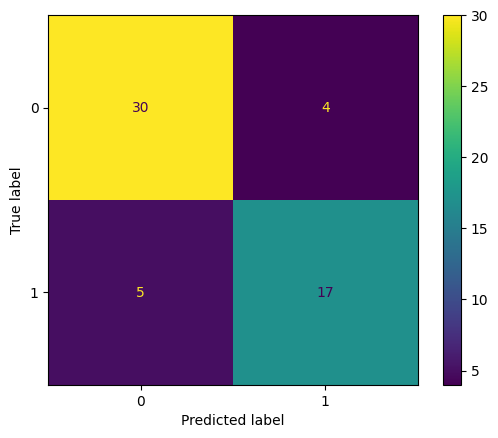

In [319]:
cm=confusion_matrix(Y_test, prediction)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [307]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [320]:
rf_random = RandomizedSearchCV(estimator = RandomForest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   2.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
123 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 638, in _validate

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [321]:

n_estimators = rf_random.best_params_['n_estimators']
min_samples_split = rf_random.best_params_['min_samples_split']
min_samples_leaf = rf_random.best_params_['min_samples_leaf']
max_features = rf_random.best_params_['max_features']
max_depth = rf_random.best_params_['max_depth']
bootstrap = rf_random.best_params_['bootstrap']

rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [322]:
RF2 = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, max_depth=max_depth, bootstrap=bootstrap, random_state=42)
RF2.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=False, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=2000, random_state=42)

In [323]:
prediction2 =RF2.predict(X_test)


accuracy2 = accuracy_score(Y_test, prediction2)
precision2 = precision_score(Y_test, prediction2)
recall2 = recall_score(Y_test, prediction2)
f12 = f1_score(Y_test, prediction2)

print(f"Accuracy = {accuracy2} ")
print(f"Precision = {precision2} ")
print(f"Recall = {recall2} ")
print(f"F1 = {f12}")

Accuracy = 0.875 
Precision = 0.8571428571428571 
Recall = 0.8181818181818182 
F1 = 0.8372093023255814


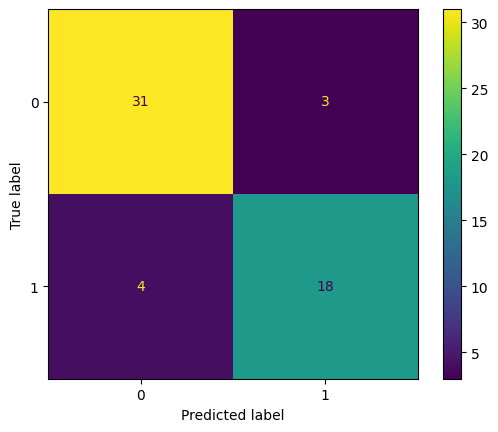

In [324]:
cm=confusion_matrix(Y_test, prediction2)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [338]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [5,15,20, 40],
    'max_features': ['auto',2,3],
    'min_samples_leaf': [1, 3, 4],
    'min_samples_split': [3,6,9],
    'n_estimators': [900, 1200, 2000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
grid_search.best_params_



Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
221 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\anoca\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py", line 638, in _validate

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1200}

In [326]:

best_grid = grid_search.best_estimator_

n_estimators2 =grid_search.best_params_['n_estimators']
min_samples_split2 = grid_search.best_params_['min_samples_split']
min_samples_leaf2 = grid_search.best_params_['min_samples_leaf']
max_features2 = grid_search.best_params_['max_features']
max_depth2 = grid_search.best_params_['max_depth']
bootstrap2 = grid_search.best_params_['bootstrap']

best_grid



RandomForestClassifier(bootstrap=False, max_depth=15, max_features=2,
                       min_samples_leaf=4, min_samples_split=6,
                       n_estimators=1200)

In [351]:
RF3 = RandomForestClassifier(n_estimators=n_estimators2, min_samples_split=min_samples_split2, min_samples_leaf=min_samples_leaf2, max_features=max_features2, max_depth=max_depth2, bootstrap=bootstrap2)

RF3.fit(X_train, Y_train)

prediction3 =RF3.predict(X_test)


In [352]:
accuracy3 = accuracy_score(Y_test, prediction3)
precision3 = precision_score(Y_test, prediction3)
recall3 = recall_score(Y_test, prediction3)
f13 = f1_score(Y_test, prediction3)
print(f"Accuracy = {accuracy3} ")
print(f"Precision = {precision3} ")
print(f"Recall = {recall3} ")
print(f"F1 = {f13}")

Accuracy = 0.8571428571428571 
Precision = 0.8181818181818182 
Recall = 0.8181818181818182 
F1 = 0.8181818181818182


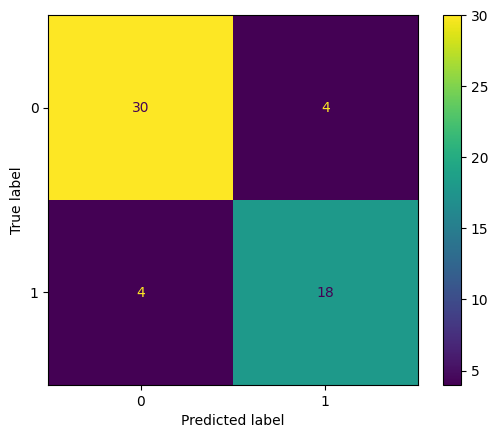

In [353]:
cm=confusion_matrix(Y_test, prediction3)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Precisao é os casos que prevemos como cancro sao mesmo cancro, recall os casos onde é realmente cancro prevemos corretamente cancro.

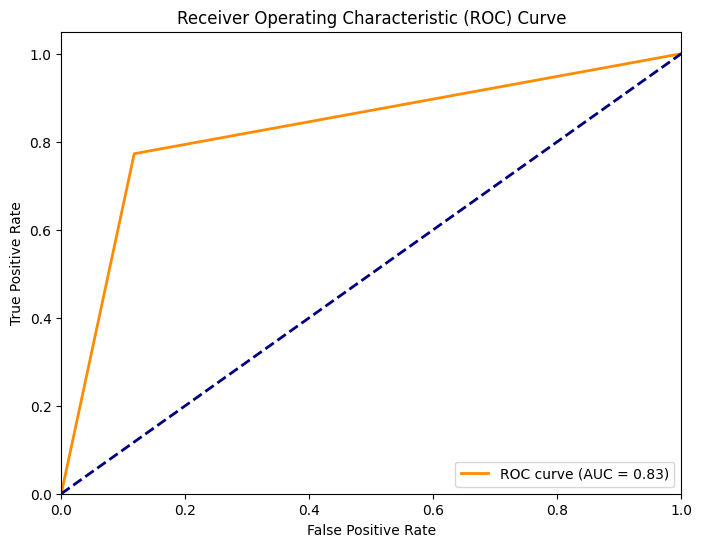

In [354]:
fpr, tpr, thresholds = roc_curve(Y_test, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

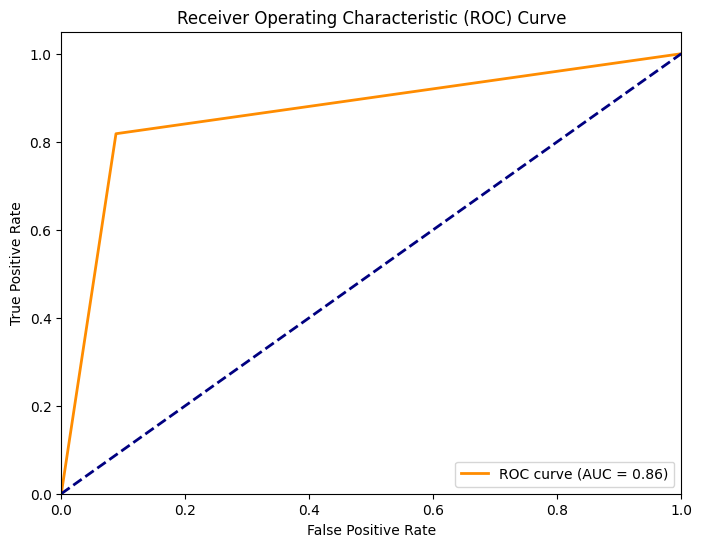

In [355]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test, prediction2)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

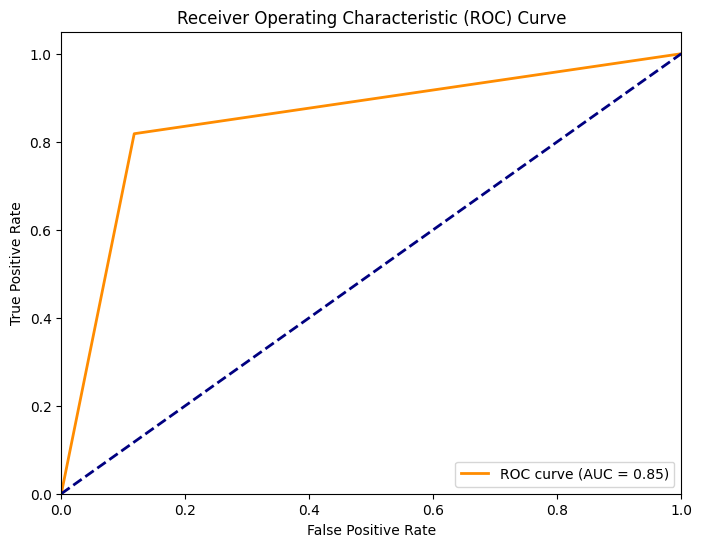

In [356]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test, prediction3)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8, 6))
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [357]:
print("Default: " + str(roc_auc_score(Y_test, prediction)))
print("Ramdomized: " +  str(roc_auc_score(Y_test, prediction2)))
print("Grid Search: " +  str(roc_auc_score(Y_test, prediction3)))


Default: 0.8275401069518716
Ramdomized: 0.8649732620320857
Grid Search: 0.8502673796791445


In [358]:
results = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC_SCORE'],
    'DEFAULT': [accuracy, precision, recall, f1, roc_auc_score(Y_test, prediction)],
    'RANDOMIZED_SEARCH_CV': [accuracy2, precision2, recall2, f12, roc_auc_score(Y_test, prediction2)],
    'GRID_SEARCH_CV': [accuracy3, precision3, recall3, f13, roc_auc_score(Y_test, prediction3)]
}


metrics = pd.DataFrame(results)

metrics

,Métrica,DEFAULT,RANDOMIZED_SEARCH_CV,GRID_SEARCH_CV
0,Accuracy,0.839286,0.875000,0.857143
1,Precision,0.809524,0.857143,0.818182
2,Recall,0.772727,0.818182,0.818182
3,F1,0.790698,0.837209,0.818182
4,ROC_AUC_SCORE,0.827540,0.864973,0.850267


In [348]:
def selected_pacient(pacient):
    for i in  df_best_features_with_id['id']:
        if(i.startswith(pacient)):
            return 'In dataset'
    return 'Not in dataset'

In [350]:
df_best_features_with_id.head()

selected_pacient('LIDC-IDRI-0068')

'In dataset'